In [2]:
#import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

#read data set as DataFrame
df = pd.read_csv('./datasets/Scotia_Business_Inc._Export_Development_and_Investment_Attraction_Activity.csv')

#select features
features = ["nsbi_sector", "Deal Type", "NSBI Financial Contribution (Commitment/Announced)", "Place Name", "nsbi_county"]

#encode categorical features as numeric values
le = LabelEncoder()
df[features] = df[features].apply(le.fit_transform)

#split data into X and y
X = df[features]
y = df["cluster"] #assuming there is a cluster column with labels

#create and fit random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

#predict cluster labels for new data
new_data = [[0, 1, 5000, 3, 2], [2, 0, 10000, 5, 4], [1, 2, 15000, 7, 6]] #example new data
new_labels = rf.predict(new_data)
print(new_labels)

#evaluate the classifier using silhouette score
score = silhouette_score(X, y)
print(score)

KeyError: 'cluster'

In [15]:
#import libraries 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans

#read data set as DataFrame 
df = pd.read_csv('./datasets/Scotia_Business_Inc._Export_Development_and_Investment_Attraction_Activity.csv')

#select features 
features = ["nsbi_sector", "Deal Type", "PostalCode", "Place Name", "nsbi_county"]

#encode categorical features as numeric values 
le = LabelEncoder() 
df[features] = df[features].apply(le.fit_transform)

#create clusters using k-means 
kmeans = KMeans(n_clusters=3) #specify the number of clusters 
df['cluster'] = kmeans.fit_predict(df[features]) #create cluster column with labels

#split data into X and y 
X = df[features] 
y = df["cluster"]

#create and fit random forest classifier 
rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(X, y)

#predict cluster labels for new data 
new_data = [[0, 1, 3, 3, 2], [2, 0, 40, 5, 4], [1, 2, 20, 7, 6]] #example new data 
new_labels = rf.predict(new_data) 
print(new_labels)

#evaluate the classifier using silhouette score 
score = silhouette_score(X, y) 
print(score)

C:\Study\Data Mining\documents\initial analysis report\data_mining_venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0]
0.5501626694978667


C:\Study\Data Mining\documents\initial analysis report\data_mining_venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


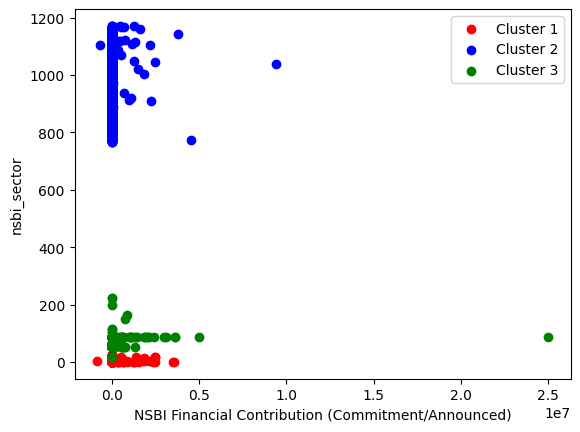

In [17]:
import matplotlib.pyplot as plt

# Create a scatter plot of two features, using different colors for each cluster
plt.scatter(df.loc[df['cluster'] == 0, 'NSBI Financial Contribution (Commitment/Announced)'],
            df.loc[df['cluster'] == 0, 'nsbi_sector'], color='red', label='Cluster 1')
plt.scatter(df.loc[df['cluster'] == 1, 'NSBI Financial Contribution (Commitment/Announced)'],
            df.loc[df['cluster'] == 1, 'PostalCode'], color='blue', label='Cluster 2')
plt.scatter(df.loc[df['cluster'] == 2, 'NSBI Financial Contribution (Commitment/Announced)'],
            df.loc[df['cluster'] == 2, 'Place Name'], color='green', label='Cluster 3')

# Add axis labels and legend
plt.xlabel('NSBI Financial Contribution (Commitment/Announced)')
plt.ylabel('nsbi_sector')
plt.legend()

# Show the plot
plt.show()